In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [10]:
#checking for missing values
df.isnull().value_counts()

,,,,,count
CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),
False,False,False,False,False,200


In [ ]:
#selecting Annual Income column and spending score column
customer_data = df.iloc[:,[3,4]].values
print(customer_data)

In [14]:
#selecting the number of clusters based on WCSS= within clusters sum of squares - elbow method

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmeans.fit(customer_data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

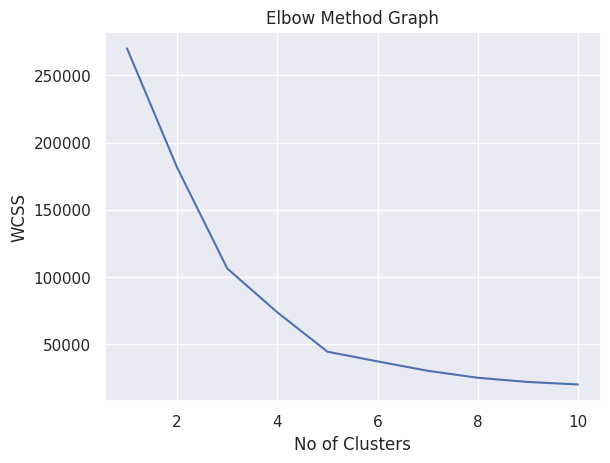

In [17]:
#plotting an elbow graph to find how many number of clusters have a min wcss value

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Method Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

we choose a value of 'k' at a point where there is no much significant drop in wcss value after that point. So here it is , k=5

In [18]:
#training the K-means clustering model
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)

# returning a label for each data point based on which cluster they belong to

y_kmeans = kmeans.fit_predict(customer_data)
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


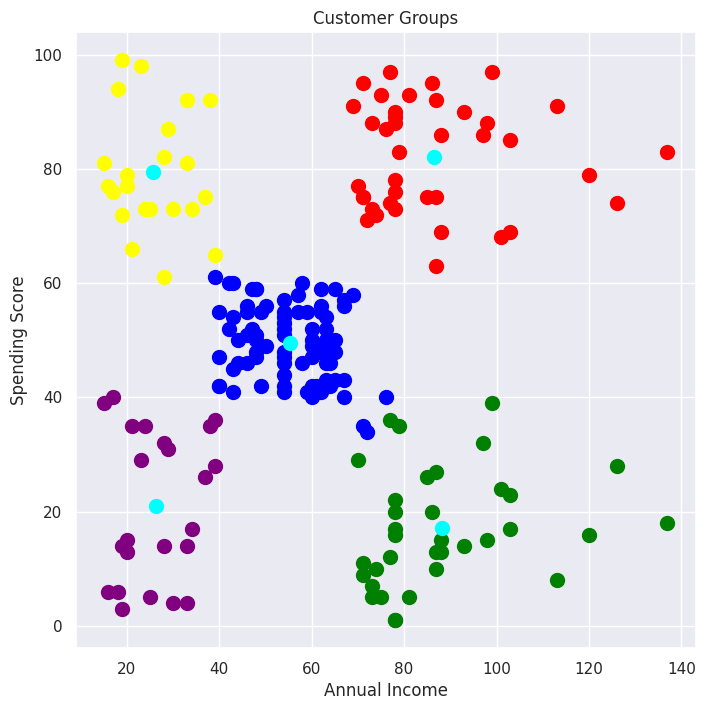

In [21]:
#Visualising all the clusters- plotting clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(customer_data[y_kmeans == 0, 0], customer_data[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(customer_data[y_kmeans == 1, 0], customer_data[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(customer_data[y_kmeans == 2, 0], customer_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(customer_data[y_kmeans == 3, 0], customer_data[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(customer_data[y_kmeans == 4, 0], customer_data[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
